In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
features = pd.read_csv("../out/features.csv")

In [6]:
features

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,category
0,-0.404430,1.155006,-0.740773,-2.961658,1.801913,-0.242536,1.857570,-0.254913,-0.978073,1.822477,...,0.033793,-0.001358,0.001726,-0.007766,0.000846,0.010081,0.007621,-0.003364,-0.029661,6
1,-4.742659,-2.653192,2.328010,-1.341742,-0.523740,1.135419,4.303751,0.076033,1.117610,1.313731,...,0.017817,0.017958,-0.029652,-0.000808,-0.024877,0.043712,-0.017234,-0.025902,0.012844,6
2,-2.267105,-3.429527,-0.299755,0.247300,-1.482006,1.919277,4.370606,-0.297720,0.505748,-0.406859,...,0.033447,0.021208,0.001220,0.009072,-0.009315,-0.015222,-0.009882,-0.008997,-0.004829,2
3,4.123736,-1.890918,-0.354633,-2.716813,2.066115,-0.967330,1.634498,2.622190,-0.074291,0.483950,...,-0.011892,0.000576,-0.021258,-0.011923,-0.010208,0.046039,-0.001143,-0.016683,-0.001690,6
4,0.903111,-3.140924,0.528126,-1.869242,1.415129,-0.443578,2.662086,0.479715,0.357136,0.477682,...,-0.008453,0.009690,0.019008,-0.000993,0.000767,0.019422,-0.005779,0.000947,-0.006775,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,-1.632127,0.441811,1.536299,-0.075685,0.073253,-4.218681,-1.355283,-1.130488,0.365639,0.236940,...,0.002898,-0.013165,-0.001794,-0.005593,0.004598,0.008300,-0.008712,-0.002514,-0.006061,0
1553,0.280431,2.813845,0.346462,-1.036588,-1.990714,-2.792877,1.353116,-1.647535,2.045346,1.527902,...,-0.012664,0.025129,-0.029015,-0.005333,0.006766,0.000331,-0.001010,0.006044,0.022700,5
1554,-1.449835,-0.230418,-1.347818,1.504774,-0.680241,1.796161,-2.914210,-1.870444,-0.538356,3.119694,...,0.023186,0.001803,-0.011203,-0.002825,-0.003776,-0.003766,-0.023355,-0.028299,0.018933,4
1555,0.909817,0.687209,2.415326,-0.536511,-3.278171,1.879050,-1.496972,-1.060167,0.847525,-1.383095,...,-0.007967,-0.003540,0.003415,0.027644,-0.012290,0.005643,-0.017852,-0.009625,-0.001789,4


In [7]:
features["category"].unique()

array([6, 2, 0, 1, 4, 5, 3])

In [8]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,0:99], features.iloc[:,100])

In [9]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,0:99], features.iloc[:,100])
fscores = []
acc = []
w_avg = []
m_avg = []
n_replications = 1

for train_index, test_index in split:
  for i in range(n_replications):
    print("Replication: ", i)
    X_train, Y_train = features.loc[train_index].iloc[:, :99], features.loc[train_index].iloc[:, 100] 
    x_test, y_test = features.loc[test_index].iloc[:, :99], features.loc[test_index].iloc[:, 100]

    model = svm.SVC(kernel="linear", decision_function_shape='ovo',  class_weight="balanced")
    model.fit(X_train, Y_train)
    
    y_predicted = model.predict(x_test)
    precision, recall, fscore, support = score(y_test, y_predicted)
    acc.append(accuracy_score(y_test, y_predicted))
    print("Fscore:", fscore)
    print("Acc:", acc)
    fscores.append(fscore)
    w_avg.append(f1_score(y_test, y_predicted, average='weighted'))
    m_avg.append(f1_score(y_test, y_predicted, average='macro'))


Replication:  0
Fscore: [0.17142857 0.0754717  0.34782609 0.17777778 0.10909091 0.26153846
 0.07692308]
Acc: [0.22115384615384615]
Replication:  0
Fscore: [0.18333333 0.15151515 0.18309859 0.06666667 0.06557377 0.24657534
 0.13559322]
Acc: [0.22115384615384615, 0.17307692307692307]
Replication:  0
Fscore: [0.09638554 0.06349206 0.21590909 0.10909091 0.04081633 0.24817518
 0.10169492]
Acc: [0.22115384615384615, 0.17307692307692307, 0.15755627009646303]
Replication:  0
Fscore: [0.2020202  0.06060606 0.25301205 0.08510638 0.04081633 0.15827338
 0.14285714]
Acc: [0.22115384615384615, 0.17307692307692307, 0.15755627009646303, 0.1639871382636656]
Replication:  0
Fscore: [0.24719101 0.06451613 0.29213483 0.         0.03448276 0.1641791
 0.18461538]
Acc: [0.22115384615384615, 0.17307692307692307, 0.15755627009646303, 0.1639871382636656, 0.1832797427652733]


In [10]:
kf = KFold(n_splits=5, shuffle=True)
split = kf.split(features.iloc[:,0:99], features.iloc[:,100])

fscores, precisions, recalls = [], [], []

acc = []
w_avg_f = []
m_avg_f = []

w_avg_p = []
m_avg_p = []

w_avg_r = []
m_avg_r = []

n_replications = 1
fold = 1

for train_index, test_index in split:
  for i in range(n_replications):
    print("Replication: ", i)
    print("Fold: ", fold)
    X_train, Y_train = features.loc[train_index].iloc[:, :99], features.loc[train_index].iloc[:, 100] 
    x_test, y_test = features.loc[test_index].iloc[:, :99], features.loc[test_index].iloc[:, 100]
    
    clf = RandomForestClassifier()
    clf.fit(X_train, Y_train)


    y_predicted = clf.predict(x_test)
    precision, recall, fscore, support = score(y_test, y_predicted)
    acc.append(accuracy_score(y_test, y_predicted))
    
    fscores.append(fscore)
    precisions.append(precision)
    recalls.append(recall)
    
    w_avg_f.append(f1_score(y_test, y_predicted, average='weighted'))
    m_avg_f.append(f1_score(y_test, y_predicted, average='macro'))

    w_avg_p.append(precision_score(y_test, y_predicted, average='weighted'))
    m_avg_p.append(precision_score(y_test, y_predicted, average='macro'))

    w_avg_r.append(recall_score(y_test, y_predicted, average='weighted'))
    m_avg_r.append(recall_score(y_test, y_predicted, average='macro'))
  
  fold += 1

    

Replication:  0
Fold:  1


/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Replication:  0
Fold:  2


/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Replication:  0
Fold:  3


/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Replication:  0
Fold:  4


/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Replication:  0
Fold:  5


/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/gegen07/anaconda3/envs/ds-comp/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
metrics_f = pd.DataFrame(fscores, columns = ["0_fscore", "1_fscore", "2_fscore", "3_fscore", "4_fscore", "5_fscore", "6_fscore"])
metrics_p = pd.DataFrame(precisions, columns = ["0_fscore", "1_fscore", "2_fscore", "3_fscore", "4_fscore", "5_fscore", "6_fscore"])
metrics_r = pd.DataFrame(recalls, columns = ["0_fscore", "1_fscore", "2_fscore", "3_fscore", "4_fscore", "5_fscore", "6_fscore"])

In [12]:
metrics_f["accuracy"] = acc
metrics_f["weighted avg"] = w_avg_f
metrics_f["macro avg"] = m_avg_f

metrics_p["weighted avg"] = w_avg_p
metrics_p["macro avg"] = m_avg_p

metrics_r["weighted avg"] = w_avg_r
metrics_r["macro avg"] = m_avg_r



In [20]:
metrics_f.to_csv("/content/drive/My Drive/gowalla_texas_result_f_10.csv", index=None)
metrics_p.to_csv("/content/drive/My Drive/gowalla_texas_result_p_10.csv", index=None)
metrics_r.to_csv("/content/drive/My Drive/gowalla_texas_result_r_10.csv", index=None)

In [13]:
metrics_f

,0_fscore,1_fscore,2_fscore,3_fscore,4_fscore,5_fscore,6_fscore,accuracy,weighted avg,macro avg
0,0.083333,0.000000,0.504673,0.142857,0.000000,0.328205,0.117647,0.375000,0.309891,0.168102
1,0.035714,0.000000,0.490196,0.000000,0.181818,0.403941,0.000000,0.378205,0.310088,0.158810
2,0.043478,0.000000,0.490798,0.000000,0.105263,0.310160,0.000000,0.356913,0.287055,0.135671
3,0.000000,0.133333,0.506173,0.000000,0.000000,0.393782,0.000000,0.389068,0.320516,0.147613
4,0.083333,0.086957,0.501608,0.166667,0.142857,0.352332,0.000000,0.376206,0.313411,0.190536


<AxesSubplot: xlabel='category', ylabel='count'>

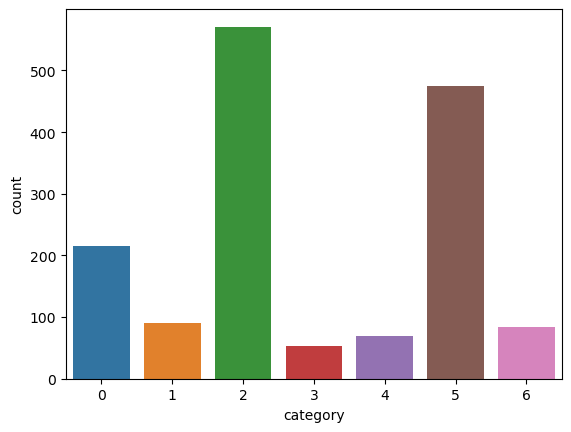

In [16]:
sns.countplot(data=features,
              x="category")

In [17]:
features.iloc[:, 100].value_counts()

2    571
5    475
0    215
1     90
6     84
4     69
3     53
Name: category, dtype: int64

In [18]:
features.iloc[:, 100].value_counts()

2    571
5    475
0    215
1     90
6     84
4     69
3     53
Name: category, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features.iloc[:, 0:99],
                                                    features.iloc[:, 100], 
                                                    test_size=0.30, 
                                                    random_state=42)
for i in [10, 20, 30, 40, 50]:
  model = svm.SVC(kernel="linear", decision_function_shape='ovo', C=i)
  model.fit(X_train, y_train)
  y_predicted = model.predict(X_test)

  precision, recall, fscore, support = score(y_test, y_predicted)
  print(accuracy_score(y_test, y_predicted))

In [ ]:
features.iloc[:, 100].unique()

array([0, 2, 7, 5, 3, 6, 1, 4])